# Predicting heart disease using machine learning
classification problem 

# 1. Problem definition 

>Goven clinicsl parameters about a patient, can we predict whether or not they have heart disease  

# 2. Data

>https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

# 3. Evaluation

> if we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project

# 4. Features

**create a data dictionary (available on kaggle)**  
1. age: age in years  
2. sex: sex (1 = male; 0 = female)  
3. cp: chest pain type  
    -- Value 0: typical angina  
    -- Value 1: atypical angina  
    -- Value 2: non-anginal pain  
    -- Value 3: asymptomatic  
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)  
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results  
    -- Value 0: normal  
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
8. thalach: maximum heart rate achieved  
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment  
    -- Value 0: upsloping  
    -- Value 1: flat  
    -- Value 2: downsloping  
12. ca: number of major vessels (0-3) colored by flourosopy  
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    and the label
14. condition: 0 = no disease, 1 = disease


# 5. Modelling

[Tools used](tools-used.png)  
[6 step ML guide](6-step-ml-guide.png)  
[ML model map](ml-map.png)  

# 6. Experiment

In [1]:
# Import all the tools we need...

# regular eda and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
#load data

df=pd.read_csv("heart_cleveland_upload.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
df.shape

(297, 14)

## data exploration (EDA or exploratory data analysis)
> The goal here is to find out more about the data and become a subject matter expert on the dataset you are working with  

there are no fixed steps for doing EDA, however a short checklist can be:
1. what questions are you trying to solve?
2. what kind of data do we have and how do we treat different types?
3. What's missing from the data and how do ypou deal with it?
4. where are the outliners and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
# lets find out how many of each class there
df["condition"].value_counts()

0    160
1    137
Name: condition, dtype: int64

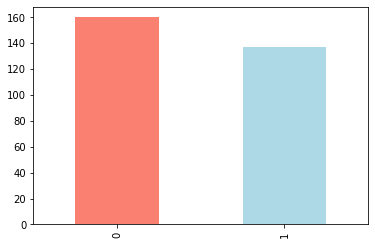

In [5]:
df.condition.value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
# are there any missing values?
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


# heart disease frequecny according to sex

In [9]:
df.sex.value_counts()

1    201
0     96
Name: sex, dtype: int64

In [10]:
# compare target column with sex solumn
pd.crosstab(df.condition, df.sex)

sex,0,1
condition,,
0,71,89
1,25,112


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

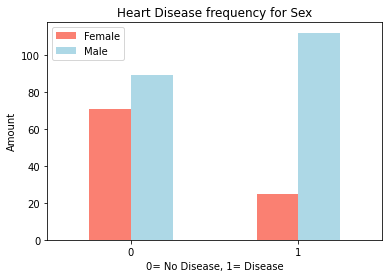

In [11]:
# create a plot of cross tab (making it more visual)
pd.crosstab(df.condition, df.sex).plot(kind="bar", color=["salmon","lightblue"]);

plt.title("Heart Disease frequency for Sex")
plt.xlabel("0= No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


  ## age vs max.heart rate for heart disease

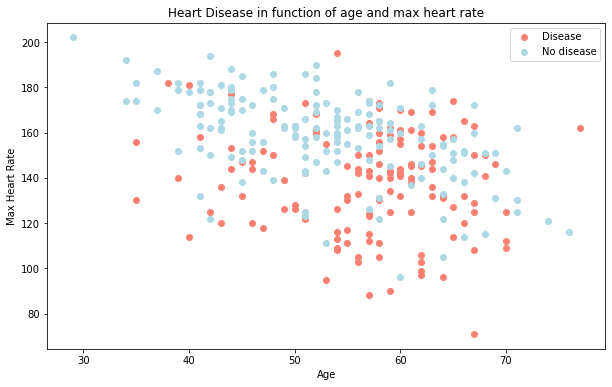

In [13]:
# create another figure
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df.age[df.condition==1],
           df.thalach[df.condition==1],
           c="salmon");

#scatter with negative examples
plt.scatter(df.age[df.condition==0],
           df.thalach[df.condition==0],
           c="lightblue");

#add some helpful info
plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No disease"]);

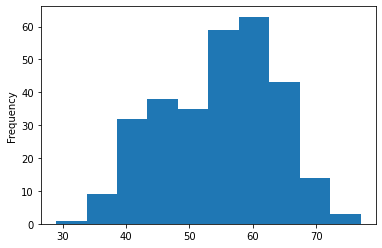

In [14]:
# check the distribution/spread of the age column with a histogram
df.age.plot.hist();

## Heart Disease frequency per chest pain type

    -- Value 0: typical angina  - chest pain related desease blood supply to the heart
    -- Value 1: atypical angina  - chest pain not related to heart  
    -- Value 2: non-anginal pain - typical esophageal spasms 
    -- Value 3: asymptomatic - chest pain not showing signs of disease

In [15]:
df.cp.value_counts()

3    142
2     83
1     49
0     23
Name: cp, dtype: int64

In [16]:
pd.crosstab(df.cp,df.condition)

condition,0,1
cp,,
0,16,7
1,40,9
2,65,18
3,39,103


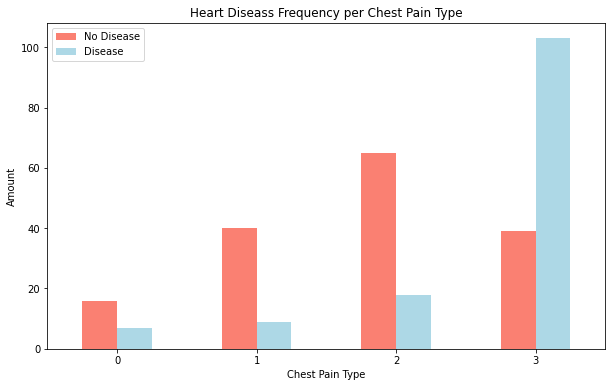

In [17]:
# make the crosstab more visual
pd.crosstab(df.cp,df.condition).plot(kind="bar",
                                     figsize=(10,6),
                                    color=["salmon","lightblue"])

# adding information to graph
plt.title("Heart Diseass Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [19]:
# make a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


correlation : either positive or negative  
**a higher positive value means a potential positive correlation and a higher negative value means a potential negative correlation or a decrease**

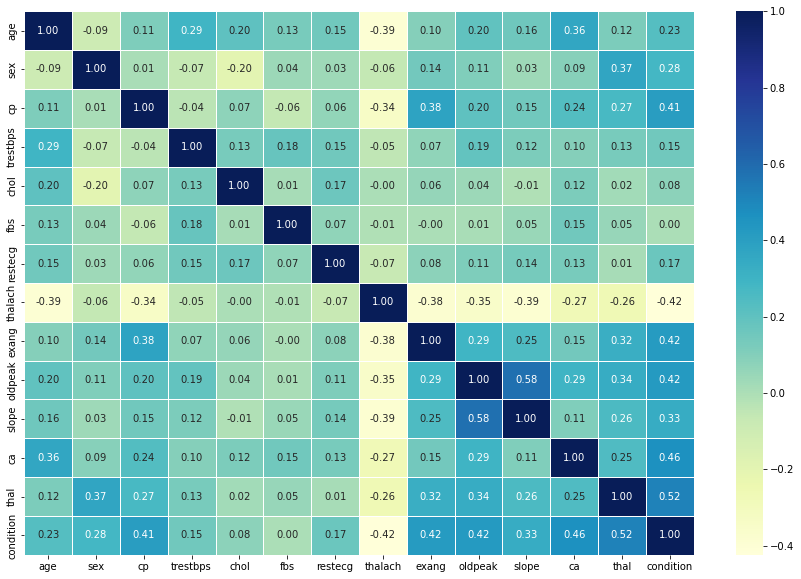

In [20]:
# lets make our correlation matrix a little prettier (aka heatmap)
corr_matrix= df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
               annot= True,
               linewidths= 0.5,
               fmt= ".2f",
               cmap= "YlGnBu");

# if adjustment needed (in case of overlapping text)
#bottom, top= ax.get_ylim()
#ax.set_ylim(bottom+0.5, top-0.5)

# modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [22]:
#split data into x and y
X= df.drop("condition", axis=1)
y=df["condition"]

In [23]:
# keep in  mind that our model is never trained using test test, it is only evaluated using test set

#splitting data into training and test set

np.random.seed(42)  #so that we can reproduce our result

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [24]:
X_train.shape, y_train.shape

((237, 13), (237,))

Now we have got our data split into training and test sets, it's time to train our model.  

we will train it (find the patterns) on the training set.  

And we will test (use the patterns) on the tedt set 

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.  
**for more details refer sklearn-logistic-regression documentation**

### here we are going to try 3 different machine learning models:-  
1. Logistic Regression  
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [25]:
# put models in a dictionary for better use
models={"Logistic Regression": LogisticRegression(),
       "KNN": KNeighborsClassifier(),
       "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    fits and evaluate given machine learning models.
    models: va dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores= {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_score
        model_scores[name]= model.score(X_test, y_test)
    return model_scores
    

In [26]:
model_scores= fit_and_score(models=models,
                            X_train= X_train,
                            X_test= X_test,
                            y_train= y_train,
                            y_test= y_test)
model_scores

C:\Users\harsh\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7333333333333333,
 'KNN': 0.5666666666666667,
 'Random Forest': 0.7}

# model comparison

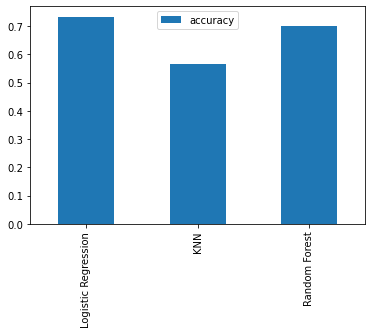

In [27]:
model_compare= pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(); # T= transpose

we hope that the best prediction for prediction heart disease is Logistic Regression 

Now we have got a baseline model..and we know a model's first prediction are not always what we should based our next stops off. what should we do?  

Let's look at the following:  
* Hyperparameter tuning  
* Feature importance
* Confusion matrix
* Cross- validation  
* Precision
* Recall 
* F1 score
* Classification report
* ROC curve
* Are under the curve (AUC)  

## HYperparameter Tuning (byhand)

In [28]:
# lets tune KNN
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(X_train, y_train)
    
    #update the training score list
    train_scores.append(knn.score(X_train,y_train))
    
    #update the test score list
    test_scores.append(knn.score(X_test,y_test))
    

In [29]:
train_scores

[1.0,
 0.7974683544303798,
 0.8016877637130801,
 0.7890295358649789,
 0.7763713080168776,
 0.7679324894514767,
 0.7679324894514767,
 0.7637130801687764,
 0.7383966244725738,
 0.7257383966244726,
 0.7257383966244726,
 0.7257383966244726,
 0.7257383966244726,
 0.729957805907173,
 0.7383966244725738,
 0.7215189873417721,
 0.7383966244725738,
 0.7426160337552743,
 0.7552742616033755,
 0.7510548523206751]

In [30]:
test_scores

[0.5166666666666667,
 0.5333333333333333,
 0.48333333333333334,
 0.5333333333333333,
 0.5666666666666667,
 0.55,
 0.55,
 0.5166666666666667,
 0.5833333333333334,
 0.5666666666666667,
 0.6166666666666667,
 0.6,
 0.5833333333333334,
 0.5833333333333334,
 0.6166666666666667,
 0.6166666666666667,
 0.6166666666666667,
 0.6,
 0.6,
 0.6]

Maximum KNN score on the test data:61.67%


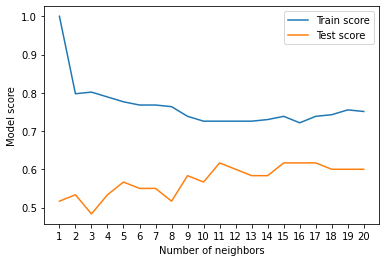

In [31]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label= "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

even after tuning KNN has lesser accuracy than the other two models ,thus discarding this model

## Hyperparameter tuing with RandomizedSearchCV

we are going to tune:  
* LogisticRegression()
* RandomForestClassifier() 
...using RandomizedSearchCV

In [32]:
# create a hypermeter grid for logisticregression
log_reg_grid= {"C": np.logspace(-4,4,20),
              "solver": ["liblinear"]}

#create a hyperparameter grid for the randomforestclassifier
rf_grid= {"n_estimators": np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf": np.arange(1,20,2)}

now we have got hypermeter grid setup for each of our models, let's tune them using randomizedsearchcv..

In [33]:
# Tune LogisticRegression
np.random.seed(42)

# setup random hyperparameter search for logisticregression
rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                              param_distributions= log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose= True)
#fit random hyperparameter search model for logisticregression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

the higher the cross validation (cv) ,the longer will it take to train

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [35]:
rs_log_reg.score(X_test, y_test)

0.7333333333333333

now we have tuned logisticregression() let's do the same with randomforestclassifier()

In [36]:
# setup random seed
np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions= rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
# fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [38]:
# evaluate the randomized search randomforestclassifier()
rs_rf.score(X_test, y_test)

0.7333333333333333

so far we get to know that logisticregression is doing the best for our model ,thus processing further with it

hyperparameter tuning methods:  
    1.by hand
    2.RandomizedSearchCV
    3.GridSearchCV

# Hyperparameter tuning with GridSearchCV

In [39]:
log_reg_grid= {"C":np.logspace(-4,4,30),
              "solver": ["liblinear"]}

gs_log_reg= GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [40]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [41]:
gs_log_reg.score(X_test,y_test)

0.7333333333333333

In [42]:
model_scores

{'Logistic Regression': 0.7333333333333333,
 'KNN': 0.5666666666666667,
 'Random Forest': 0.7}

#evaluting our  tuned machinre learning classifier beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

..and it would be great if cross-validation was used where possible  

To make comparison and evaluate our trained model, first we need to make prediction.



In [43]:
y_preds= gs_log_reg.predict(X_test)
y_preds

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [44]:
y_test

167    1
211    1
63     0
154    0
5      0
77     0
183    1
158    1
9      0
139    0
285    0
78     0
92     0
101    0
42     0
222    1
283    1
33     1
263    1
148    0
245    1
45     1
60     0
46     0
278    0
237    1
175    1
234    1
17     0
279    1
111    0
219    1
24     0
82     0
7      1
75     1
108    0
84     0
90     0
73     0
116    0
126    1
233    0
59     0
195    1
208    1
97     0
185    1
176    0
124    0
93     1
294    1
182    1
275    0
192    1
292    1
25     0
224    1
6      0
181    1
Name: condition, dtype: int64

ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

C:\Users\harsh\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


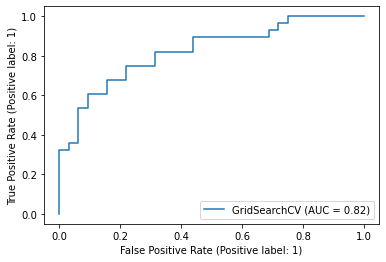

In [47]:
#plot ROC curve and calculate AUC metric

plot_roc_curve(gs_log_reg, X_test, y_test)

In [49]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[23  9]
 [ 7 21]]


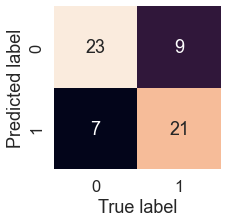

In [57]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmat()
    """
    
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    #incase if annotation is not properlyt aligned then use
    """
    bottom, top= ax.get_ylim()
    ax.set_ylim(bottom+0.5, top-0.5)
    """
    
plot_conf_mat(y_test,y_preds)

now we have got a ROC curve, an AUC metric and a confusion matrix, let's get a classificstion report as well as cross validatwed precision, recall and f1-score

In [59]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



  f1 is the combination of precision and recall  
  if there is a vast difference of support between 0 & 1 then there is class imbalance  

### Calculate evaluation matrix using cross validation

we are going to calculate accuracy, precision, recall and f1-score of our model using cross validation and to do so we will be using 'cross_val_score()'  

we will pass all th X and y data while dealing with cross validation  
cv=5 i.e cross validation = 5 means the data is divided into train and test cases 5 times with different ratio each time

In [60]:
# check best hyperparameter
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [61]:
# create a new classifier with best parameters
clf= LogisticRegression(C=0.1082636733874054,
                       solver="liblinear")

In [68]:
# Cross-validated accuracy
cv_acc= cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="accuracy")
cv_acc

array([0.7       , 0.88333333, 0.83050847, 0.94915254, 0.84745763])

In [70]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8420903954802259

In [71]:
# cross-validated precision
cv_precision= cross_val_score(clf,
                             X,
                             y,
                             cv=5,
                             scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8918514588859416

In [72]:
# cross-validated recall
cv_recall= cross_val_score(clf,
                             X,
                             y,
                             cv=5,
                             scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.7690476190476191

In [73]:
# cross-validated f1
cv_f1= cross_val_score(clf,
                             X,
                             y,
                             cv=5,
                             scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.7986451979004114

In [79]:
# visualize our cross-validated metrics
cv_metrics= pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_precision,
                        "Recall":cv_recall,
                        "F1":cv_f1},
                        index=[0])
cv_metrics.T

,0
Accuracy,0.842090
Precision,0.891851
Recall,0.769048
F1,0.798645


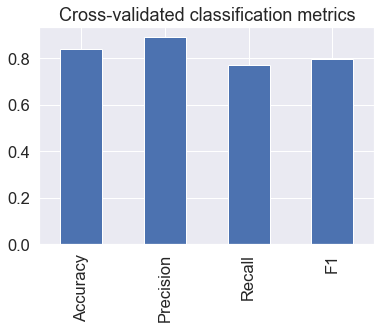

In [95]:
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

### Feature importance

feature importance is another way of asking "which features contributed most to the outcomes of the model and how did they contribute?"  
**Finding feature importance is different for each machine learning model**  
> One way to find feature importance is to search for "MODEL_NAME feature importance".   
Let's find the feature importance for our Logisticregression model...


In [83]:
# Fit and instance of LogisticRegression
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [88]:
clf= LogisticRegression(C=0.1082636733874054,
                       solver="liblinear")
clf.fit(X_train,y_train);

In [89]:
# check coefficient, helps us to identify how much each of the feature contribute to predict our target column
clf.coef_

array([[-0.01787051,  0.62310435,  0.28353547,  0.01917816,  0.00385688,
        -0.15381757,  0.23725615, -0.03666783,  0.30103731,  0.41231423,
         0.13202595,  0.74842008,  0.69975264]])

In [90]:
# match coef's of features to columns
feature_dict= dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.017870509848751732,
 'sex': 0.6231043536818834,
 'cp': 0.28353546631123644,
 'trestbps': 0.019178157467773026,
 'chol': 0.003856875101546467,
 'fbs': -0.15381757076577596,
 'restecg': 0.23725615237014785,
 'thalach': -0.03666782848733937,
 'exang': 0.3010373051035459,
 'oldpeak': 0.41231422959216657,
 'slope': 0.13202594800218045,
 'ca': 0.7484200798154752,
 'thal': 0.6997526396021311}

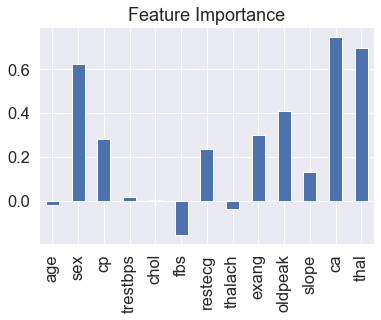

In [93]:
# visualize feature importance
feature_df= pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [96]:
pd.crosstab(df["sex"],df["condition"])

condition,0,1
sex,,
0,71,25
1,89,112


In [97]:
pd.crosstab(df.fbs,df.condition)

condition,0,1
fbs,,
0,137,117
1,23,20


as the value of sex increases the value of condition also increases  
whereas when the value of fbs increases, the value of conditon decreases  
**this is model driven exploratory analysis**

In [99]:
pd.crosstab(df.slope,df.condition)

condition,0,1
slope,,
0,103,36
1,48,89
2,9,12


 ## 6.Experimentation
 
 If you haven't hit your evaluation metric yet...ask yourself...  
 * Could youcollect more data?
 * Could you try a better model? Like CatBoost or XGBoost?
 * Could you improve the current models? (beyond what we have done so far)  
 
 >If your model is good enough (you have hit your evaluation metric ) how would you export it and share it with others?
 https://scikit-learn.org/stable/model_persistence.html